### AD470 - Module 7 Introduction to Deep LearningProgramming Assignment
#### Andrew Boyer
#### Brandan Owens

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from sklearn.preprocessing import StandardScaler

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

#### Q.1(a)  Use pandas to read in the dataset “Churn_Modelling.csv”

In [37]:
churn_df = pd.read_csv("Churn_Modelling.csv")
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### (b) Create the following bar plots.

<AxesSubplot:xlabel='Exited', ylabel='count'>

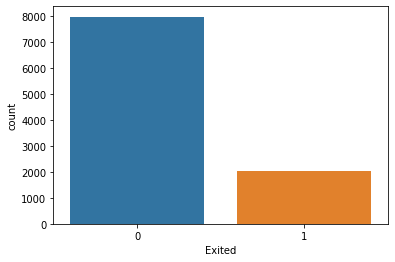

In [38]:
sns.countplot(data = churn_df, x = 'Exited' )

<AxesSubplot:xlabel='Geography', ylabel='count'>

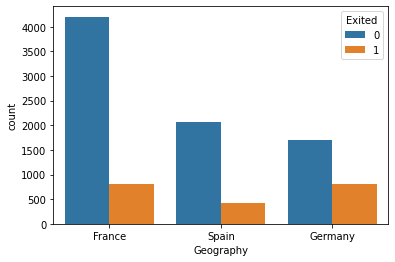

In [39]:
sns.countplot(data = churn_df , x = 'Geography', hue = 'Exited')

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

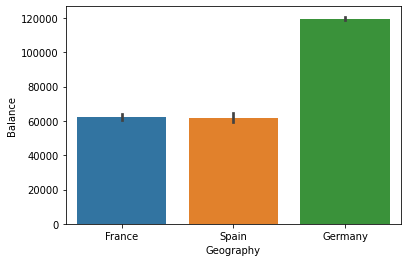

In [40]:
sns.barplot(data=churn_df , x= 'Geography', y= 'Balance')

#### (c)  From the dataframe, find the percentage of people who exited, and the percentage of people who did not exit.

In [41]:
churn_df['Exited'].value_counts()/churn_df['Exited'].count()*100

0    79.63
1    20.37
Name: Exited, dtype: float64

#### (d) Check for any missing values in the dataframe.

In [42]:
churn_df.isnull().values.any()

False

#### (e)  Define X and y

In [43]:
X = churn_df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = churn_df['Exited']

#### (f)  Get dummies for all categorical variables of X, remember to set drop_first = True.

In [44]:
X = pd.get_dummies(X, drop_first = True)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


#### (g) Split the dataset into training set and test set. test_size=0.2, random_state=0

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### (h) Use the following codes to do the feature scaling on the training and test sets. (Standardize all numerical variables by subtracting the means and dividing each variable by its standard deviation.)

In [46]:
sc_x = StandardScaler()
X_train = pd.DataFrame(sc_x.fit_transform(X_train), columns=X.columns.values)
X_test = pd.DataFrame(sc_x.transform(X_test), columns=X.columns.values)

#### (i)  Build a 4-layer neural network.

In [47]:
#model = keras.Sequential([
#    layers.Dense(6, activation='relu', input_shape=[11]),
#    layers.Dense(12, activation='relu'),
#    layers.Dense(24, activation='relu'),
#    layers.Dense(1, activation='sigmoid'),
#])

model = Sequential()
model.add(Dense(6, input_shape=(11,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_6 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


#### (j) Compile the neural network.

In [49]:
model.compile(optimizer='adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [50]:
#model.summary()
#x_partial_train = X_train[:100]
#y_partial_train = y_train[:100]
#x_val = X_train[100:]
#y_val = y_train[100:]

#### (k) Fit the model on training set. Set the batch_size =10, run for 100 epochs.

In [51]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=100, 
    batch_size =10,
)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5098 - accuracy: 0.7857 - val_loss: 0.4502 - val_accuracy: 0.7975
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4497 - accuracy: 0.7916 - val_loss: 0.4362 - val_accuracy: 0.7975
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4313 - accuracy: 0.7970 - val_loss: 0.4269 - val_accuracy: 0.8250
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4075 - accuracy: 0.8227 - val_loss: 0.4126 - val_accuracy: 0.8335
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4276 - accuracy: 0.8207 - val_loss: 0.4016 - val_accuracy: 0.8395
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4017 - accuracy: 0.8313 - val_loss: 0.3849 - val_accuracy: 0.8485
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3910 - accuracy: 0.8349 - val_loss: 0.3585 - val_accuracy: 0.8600

#### (l) Evaluate the model on test set.

In [52]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

63/63 - 0s - loss: 0.3277 - accuracy: 0.8650


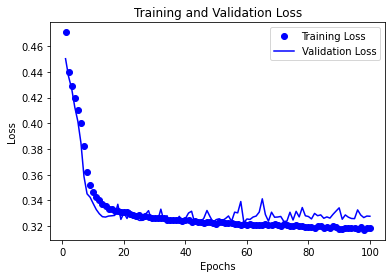

In [53]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

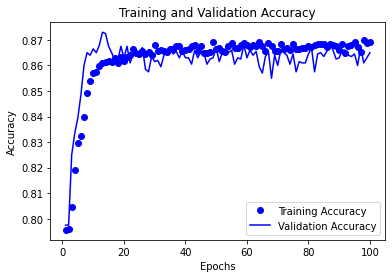

In [54]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### (m) Finally, predict the probability of y = Exited on the test set.

In [55]:
prediction = model.predict(X_test)
print(prediction)

[[0.3008452 ]
 [0.14455077]
 [0.10149753]
 ...
 [0.11793983]
 [0.17102635]
 [0.3589452 ]]


In [56]:
new_pred = (prediction > 0.6)
true_count = np.count_nonzero(new_pred)
print(true_count/new_pred.size)
print("% of employees that have a 60% or greater chance of leaving the company")



0.111
% of employees that have a 60% or greater chance of leaving the company


#### Q.2 (a)  Download the file 'natural_images.zip', and extra the files.

In [57]:
import zipfile
local_zip = "natural_images.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('natural_images')

#### (b) Use os.listdir to create a list of labels.

In [58]:
os.listdir("natural_images")

['natural_images']

#### (c)  Display the first 5 images of each class. 

In [59]:
from IPython.display import Image, display
display(Image( image file))

SyntaxError: invalid syntax (<ipython-input-59-7687c3df335a>, line 2)

#### (d) Create the following barplot.

#### (e)  Use cv2.imread() to convert images into numpy array (X). Then, use cv2.resize(), so that each image has the size (32,32) Create an array which contains the label of each image (Y).

#### (f)  Print the shape of images (X) and shape of labels (Y).

#### (g) Standardize X by dividing X by 255.

#### (h) Use LabelEncoder() to encode Y. Use to_categorical() covert Y into categorical numpy array.

#### (i)  Split the data into training set and test set. test_size = 0.33, random_state = 46.

#### (j)  But a CNN model- first layer is Conv2D, filters =32, kernel_size = (5,5), activation = relu.- second layer is MaxPool2D, pool_size = (2,2)- third layer is Conv2D, filters =64, kernel_size = (3,3), activation = relu.- fourth layer is MaxPool2D, pool_size = (2,2)- fifth layer to flatten the tensors.- sixth layer is Dense, output shape = 256, activation = relu.- seventh layer is Dense, output shape = 8, activation = softmax.

#### (k) Compile the modelloss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']

#### (l)  fit the model, epochs = 25, validation_split = 0.2

#### (m)Plot the change in loss score on training set and validation set over epochs.

#### (n) Plot the change in accuracy on training set and validation set over epochs.

#### (o) Retrain the model using the entire training set and set epochs = 5. Evaluate the model on the test set.